In [10]:
! pip install kaggle

In [11]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets download altruisticemphasis/sp-bse-sensex-50

  0% 0.00/6.01M [00:00<?, ?B/s]
100% 6.01M/6.01M [00:00<00:00, 89.4MB/s]


In [15]:
! unzip sp-bse-sensex-50.zip

Archive:  sp-bse-sensex-50.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINTS.csv         
  inflating: AXISBANK.csv            
  inflating: BAJAJAUTO.csv           
  inflating: BAJAJFINANCE.csv        
  inflating: BAJAJFINESERV.csv       
  inflating: BHARTIAIRTEL.csv        
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DABUR.csv               
  inflating: DIVISLAB.csv            
  inflating: DRREDDYS.csv            
  inflating: EICHER.csv              
  inflating: GODREJCONSUM.csv        
  inflating: GRASIMINDUS.csv         
  inflating: HCLTECHNOLOGIES.csv     
  inflating: HDCFBANK.csv            
  inflating: HDFC.csv                
  inflating: HDFCLIFEINSURANCE.csv   
  inflating: HEROMOTOCORP.csv        
  inflating: HINDALCOINDUS.csv       
  inflating: HINDUSTANUNILEVER.csv   
  inflating: ICICIBANK.csv           
  inflating: INDUSI

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

##### The stocks we'll use for this analysis

In [17]:
BRITANNIA = pd.read_csv('/content/BRITANNIA.csv')
BRITANNIA.drop(['WAP','No.of Shares','No. of Trades','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis = 1, inplace = True)
BRITANNIA['Name'] = 'BRITANNIA'
BRITANNIA.rename(columns = {'Total Turnover (Rs.)':'Volume'}, inplace = True)
BRITANNIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA


In [18]:
DABUR = pd.read_csv('/content/DABUR.csv')
DABUR.drop(['WAP','No.of Shares','No. of Trades','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis = 1, inplace = True)
DABUR['Name'] = 'DABUR'
DABUR.rename(columns = {'Total Turnover (Rs.)':'Volume'}, inplace = True)
DABUR.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,558.90,561.45,554.0,558.55,130225160.0,DABUR
1,8-June-2021,549.00,560.55,549.0,556.40,81761188.0,DABUR
2,7-June-2021,544.10,549.20,542.9,548.35,27160390.0,DABUR
3,4-June-2021,542.95,544.80,539.8,543.85,30819099.0,DABUR
4,3-June-2021,534.00,541.65,534.0,540.45,67835652.0,DABUR


In [19]:
ITC = pd.read_csv('/content/ITC.csv')
ITC.drop(['WAP','No.of Shares','No. of Trades','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis = 1, inplace = True)
ITC['Name'] = 'ITC'
ITC.rename(columns = {'Total Turnover (Rs.)':'Volume'}, inplace = True)
ITC.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,214.10,214.75,211.50,212.40,439642170.0,ITC
1,8-June-2021,212.00,214.10,211.10,213.65,429523880.0,ITC
2,7-June-2021,210.15,212.35,210.15,211.45,878594038.0,ITC
3,4-June-2021,209.85,209.85,208.00,208.80,365525757.0,ITC
4,3-June-2021,210.50,210.80,208.75,209.10,421739364.0,ITC


In [20]:
NESTLEINDIA = pd.read_csv('/content/NESTLEINDIA.csv')
NESTLEINDIA.drop(['WAP','No.of Shares','No. of Trades','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis = 1, inplace = True)
NESTLEINDIA['Name'] = 'NESTLEINDIA'
NESTLEINDIA.rename(columns = {'Total Turnover (Rs.)':'Volume'}, inplace = True)
NESTLEINDIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,17489.00,17612.00,17436.05,17562.25,40433813.0,NESTLEINDIA
1,8-June-2021,17535.00,17616.45,17414.60,17487.65,23567573.0,NESTLEINDIA
2,7-June-2021,17450.05,17588.05,17350.15,17532.20,63677628.0,NESTLEINDIA
3,4-June-2021,17640.00,17683.75,17387.20,17445.15,157773675.0,NESTLEINDIA
4,3-June-2021,17670.00,17850.00,17557.45,17795.70,23079509.0,NESTLEINDIA


In [21]:
all_data = pd.concat([BRITANNIA, DABUR, ITC, NESTLEINDIA])  
all_data.shape

(10340, 7)

In [22]:
all_data.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA


In [23]:
all_data.dtypes

Date            object
Open Price     float64
High Price     float64
Low Price      float64
Close Price    float64
Volume         float64
Name            object
dtype: object

In [24]:
all_data['date']=pd.to_datetime(all_data['Date'])

In [25]:
all_data['date'][0]

0   2021-06-09
0   2021-06-09
0   2021-06-09
0   2021-06-09
Name: date, dtype: datetime64[ns]

In [26]:
all_data.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'Volume', 'Name', 'date'],
      dtype='object')

##### Analyse closing price of all the stocks

In [27]:
stock_list = all_data['Name'].unique()

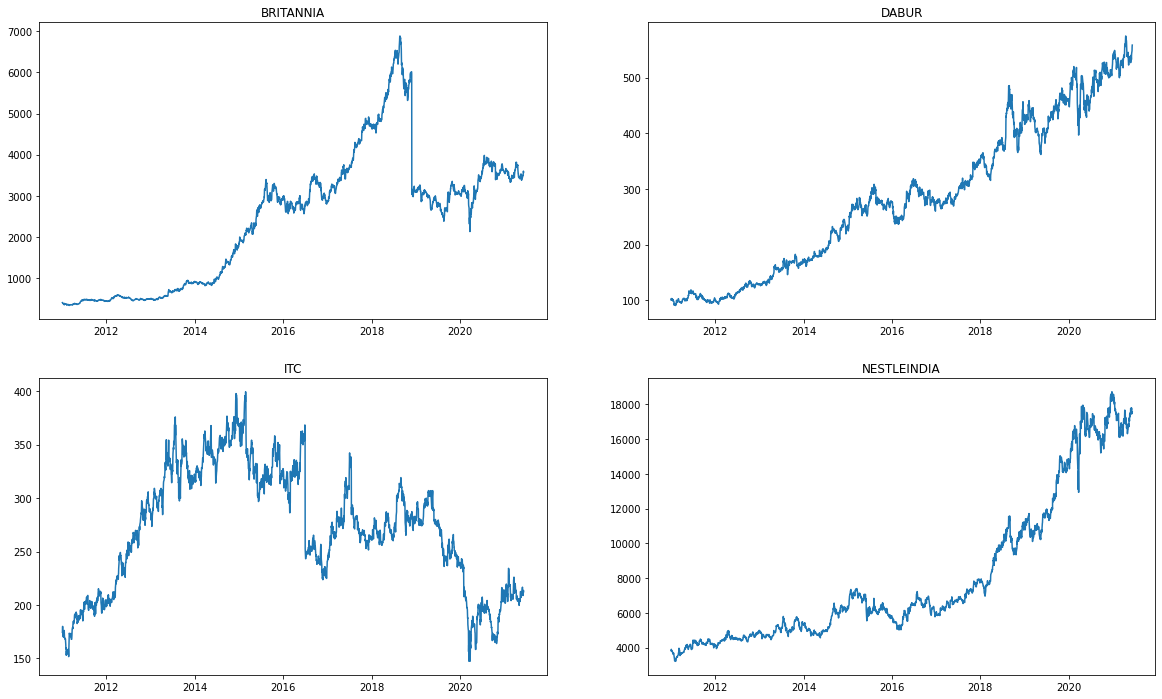

In [28]:
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['Close Price'])
    plt.title(company)   

##### let's analyse the total volume of stock being traded each day

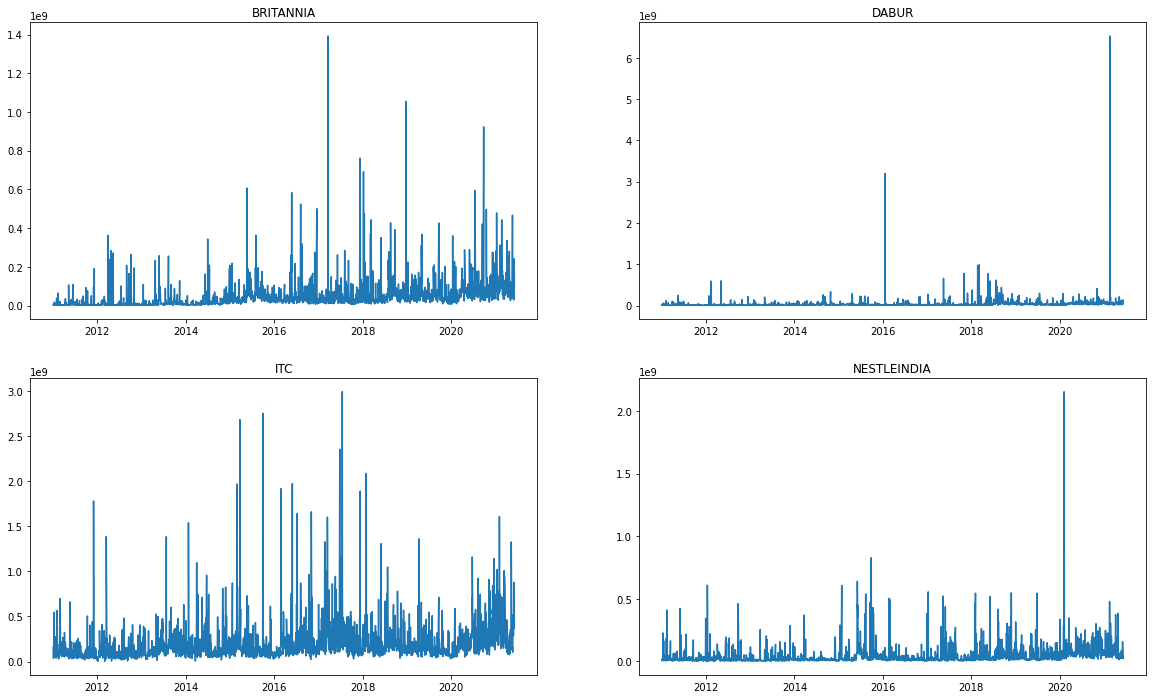

In [29]:
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['Volume'])
    plt.title(company)


##### using plotly

In [30]:
import plotly.express as px

In [31]:

for company in (stock_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="Volume", title=company)
    fig.show()

In [32]:
all_data['Name'].unique()

array(['BRITANNIA', 'DABUR', 'ITC', 'NESTLEINDIA'], dtype=object)

##### analyse Daily price change in stock

##### Daily Stock Return Formula
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [33]:
BRITANNIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA


##### percentage return

In [34]:
BRITANNIA['1day % return']=((df['Close Price']-df['Open Price'])/df['Close Price'])*100
BRITANNIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name,1day % return
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA,0.417088
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA,-0.270763
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA,0.468566
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA,-1.116929
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA,0.706350


In [35]:
BRITANNIA.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'Volume', 'Name', '1day % return'],
      dtype='object')

##### using plotly to visualise data

In [36]:
import plotly.express as px
fig = px.line(BRITANNIA, x="Date", y="1day % return", title='')
fig.show()

##### using matplotlib for visualisation

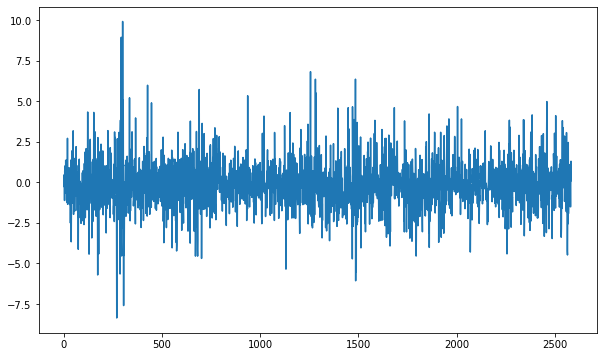

In [37]:
plt.figure(figsize=(10,6))
BRITANNIA['1day % return'].plot()

#### lets say between some interval

In [38]:
BRITANNIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name,1day % return
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA,0.417088
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA,-0.270763
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA,0.468566
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA,-1.116929
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA,0.706350


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

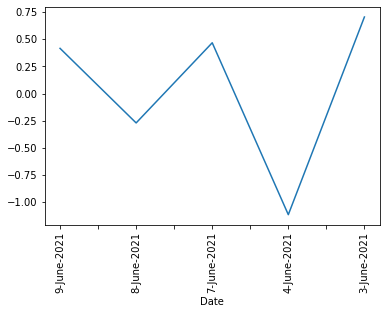

In [39]:
BRITANNIA.set_index('Date')['9-June-2021':'3-June-2021']['1day % return'].plot()
plt.xticks(rotation='vertical')

#### Analyse monthly mean of close column

In [40]:
df2=BRITANNIA.copy()

In [41]:
df2['Date']=pd.to_datetime(df2['Date'])

In [42]:
df2.set_index('Date',inplace=True)

In [43]:
df2.head()

,Open Price,High Price,Low Price,Close Price,Volume,Name,1day % return
Date,,,,,,,
2021-06-09,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA,0.417088
2021-06-08,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA,-0.270763
2021-06-07,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA,0.468566
2021-06-04,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA,-1.116929
2021-06-03,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA,0.706350


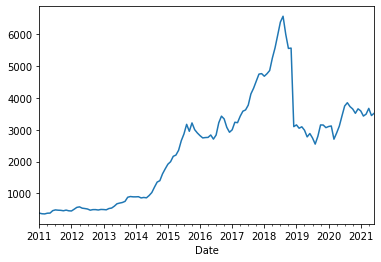

In [44]:
df2['Close Price'].resample('M').mean().plot()

##### resampling close column year wise

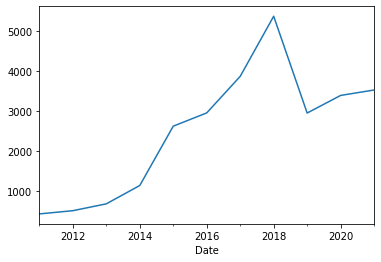

In [45]:
df2['Close Price'].resample('Y').mean().plot()

##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [46]:
### create a blank dataframe
close=pd.DataFrame()

In [47]:
close['BRITANNIA']=BRITANNIA['Close Price']
close['DABUR']=DABUR['Close Price']
close['ITC']=ITC['Close Price']
close['NESTLEINDIA']=NESTLEINDIA['Close Price']

In [48]:
close.head()

,BRITANNIA,DABUR,ITC,NESTLEINDIA
0,3577.60,558.55,212.40,17562.25
1,3600.35,556.40,213.65,17487.65
2,3542.70,548.35,211.45,17532.20
3,3490.65,543.85,208.80,17445.15
4,3495.95,540.45,209.10,17795.70


#### Multi-variate Analysis

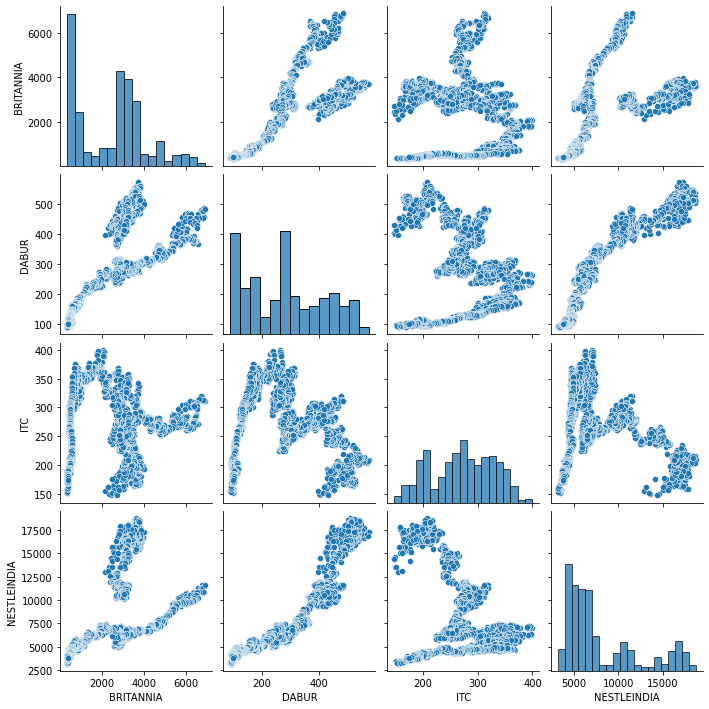

In [49]:
sns.pairplot(data=close)

##### co-relation plot for stock prices 

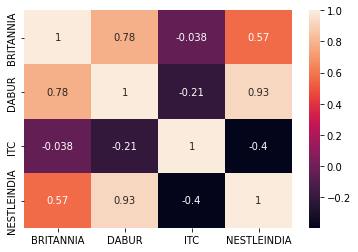

In [50]:
sns.heatmap(close.corr(),annot=True)

##### Analyse Daily return of each stock & how they are co-related

In [51]:
data=pd.DataFrame()

In [52]:
BRITANNIA.head()

,Date,Open Price,High Price,Low Price,Close Price,Volume,Name,1day % return
0,9-June-2021,3620.00,3620.00,3556.55,3577.60,104103117.0,BRITANNIA,0.417088
1,8-June-2021,3520.00,3622.00,3520.00,3600.35,209611346.0,BRITANNIA,-0.270763
2,7-June-2021,3500.00,3554.00,3477.00,3542.70,241405663.0,BRITANNIA,0.468566
3,4-June-2021,3498.00,3512.00,3480.05,3490.65,28812634.0,BRITANNIA,-1.116929
4,3-June-2021,3485.85,3499.45,3469.05,3495.95,33461419.0,BRITANNIA,0.706350


In [55]:
data['BRITANNIA_change']=((BRITANNIA['Close Price']-BRITANNIA['Open Price'])/BRITANNIA['Close Price'])*100
data['DABUR_change']=((DABUR['Close Price']-DABUR['Open Price'])/DABUR['Close Price'])*100
data['ITC_change']=((ITC['Close Price']-ITC['Open Price'])/ITC['Close Price'])*100
data['NESTLEINDIA_change']=((NESTLEINDIA['Close Price']-NESTLEINDIA['Open Price'])/NESTLEINDIA['Close Price'])*100

In [56]:
data.head()

,BRITANNIA_change,DABUR_change,ITC_change,NESTLEINDIA_change
0,-1.185152,-0.062662,-0.800377,0.417088
1,2.231727,1.329978,0.772291,-0.270763
2,1.205295,0.775052,0.614803,0.468566
3,-0.210563,0.165487,-0.502874,-1.116929
4,0.288906,1.193450,-0.669536,0.706350


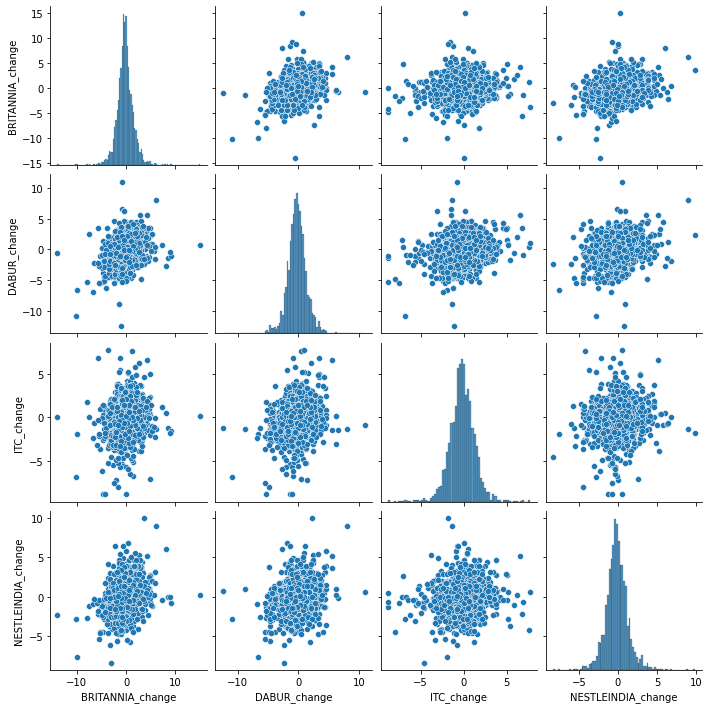

In [57]:
sns.pairplot(data=data)

##### Correlation plot for daily returns

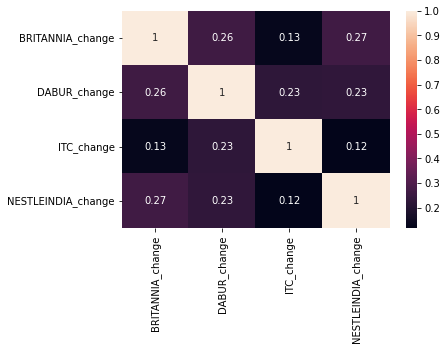

In [58]:
sns.heatmap(data.corr(),annot=True)

##### We can see that Amazon and microsoft have good correlation on daily returns

In [59]:
data.head()

,BRITANNIA_change,DABUR_change,ITC_change,NESTLEINDIA_change
0,-1.185152,-0.062662,-0.800377,0.417088
1,2.231727,1.329978,0.772291,-0.270763
2,1.205295,0.775052,0.614803,0.468566
3,-0.210563,0.165487,-0.502874,-1.116929
4,0.288906,1.193450,-0.669536,0.706350


In [60]:
data.columns

Index(['BRITANNIA_change', 'DABUR_change', 'ITC_change', 'NESTLEINDIA_change'], dtype='object')

In [61]:
type(data)

pandas.core.frame.DataFrame

#### Value at Risk analysis for BRITANNIA

In [64]:
import seaborn as sns

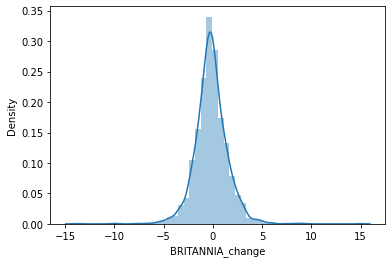

In [65]:
sns.distplot(data['BRITANNIA_change'])

##### it somehow follows a normal distribution

In [66]:
data['BRITANNIA_change'].std()

1.6774847428555766

In [67]:
data['BRITANNIA_change'].quantile(0.1)

-2.0102670517829444

##### -2.0102670517829444 means that 90% of the times the worst daily Loss will not exceed 2.01


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BRITANNIA_change,2585.0,-0.162405,1.677485,-13.883300,-1.056778,-0.205369,0.699559,14.911721
DABUR_change,2585.0,-0.203912,1.602203,-12.494978,-1.089816,-0.208225,0.698893,10.982659
ITC_change,2585.0,-0.184326,1.507150,-8.818826,-0.984324,-0.176234,0.688956,7.692308
NESTLEINDIA_change,2585.0,-0.143157,1.460609,-8.362038,-0.956398,-0.185962,0.638361,9.920522
